In [2]:
import pandas as pd

In [3]:
df=pd.read_csv(r"C:\Users\sachi\OneDrive\Product Demand Forecasting\CLEANED DATA\product_info_cleaned.csv")

In [4]:
df.sample(10)

,ProductID,Category,Brand,Material,Weight(kg),Warranty(years),ProductRating,LaunchYear
52,P0053,Beauty,BrandC,Wood,2.56,0,3.3,2018
328,P0329,Electronics,BrandB,Plastic,4.32,0,4.2,2018
391,P0392,Toys,BrandA,Plastic,3.38,0,3.0,2023
77,P0078,Beauty,BrandB,Cotton,4.82,1,2.8,2018
249,P0250,Home,BrandC,Glass,4.69,1,2.9,2019
17,P0018,Toys,BrandD,Glass,1.53,2,3.6,2022
141,P0142,Toys,BrandC,Glass,3.45,0,3.3,2020
499,P0500,Clothing,BrandB,Wood,4.01,2,4.8,2020
318,P0319,Electronics,BrandC,Metal,2.30,1,2.7,2018
138,P0139,Electronics,BrandD,Plastic,0.56,0,3.2,2020


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df.dtypes

ProductID           object
Category            object
Brand               object
Material            object
Weight(kg)         float64
Warranty(years)      int64
ProductRating      float64
LaunchYear           int64
dtype: object

# Unique Categories per Column

In [7]:
for col in ['Category', 'Brand', 'Material']:
    print(f"{col}: {df[col].nunique()} unique values")


Category: 5 unique values
Brand: 4 unique values
Material: 5 unique values


# values Count

<Axes: title={'center': 'Product Category Distribution'}, xlabel='Category'>

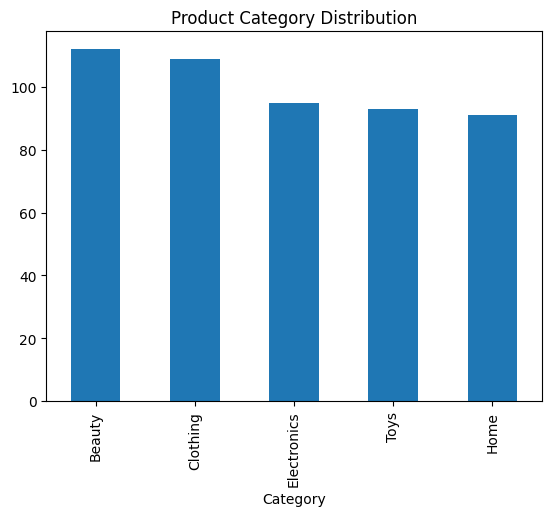

In [8]:
# Category distribution
df['Category'].value_counts().plot(kind='bar', title='Product Category Distribution')



<Axes: title={'center': 'Top 10 Brands'}, xlabel='Brand'>

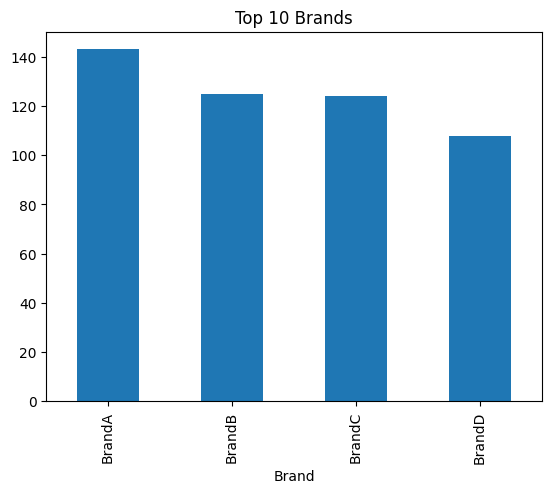

In [9]:
# Brand distribution
df['Brand'].value_counts().head(10).plot(kind='bar', title='Top 10 Brands')


<Axes: title={'center': 'Material Used'}, xlabel='Material'>

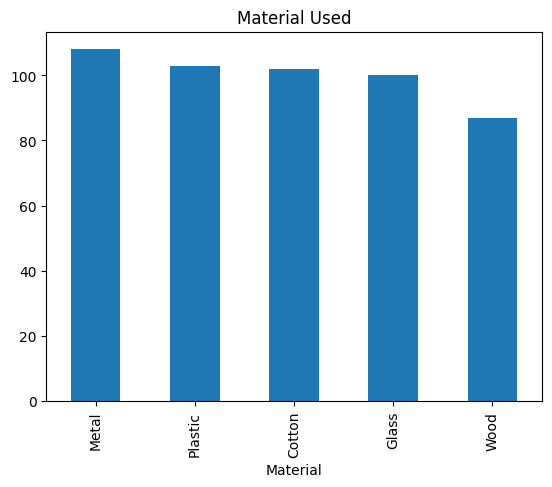

In [10]:


# Material distribution
df['Material'].value_counts().plot(kind='bar', title='Material Used')


Text(0.5, 1.0, 'Weight Distribution')

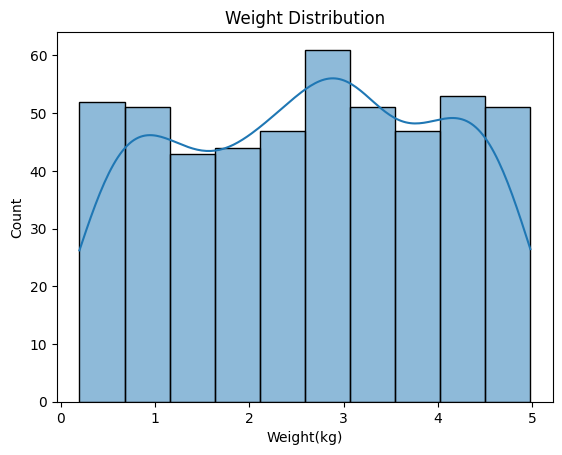

In [11]:
# Histogram for weight
sns.histplot(df['Weight(kg)'], kde=True)
plt.title("Weight Distribution")

Text(0.5, 1.0, 'Warranty (Years)')

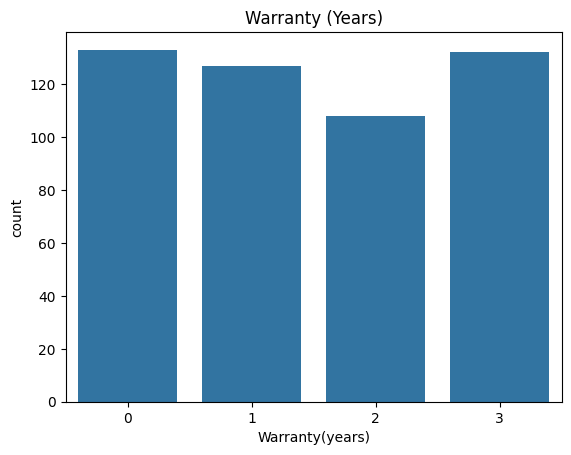

In [12]:
# Warranty
sns.countplot(x='Warranty(years)', data=df)
plt.title("Warranty (Years)")

Text(0.5, 1.0, 'Product Rating Distribution')

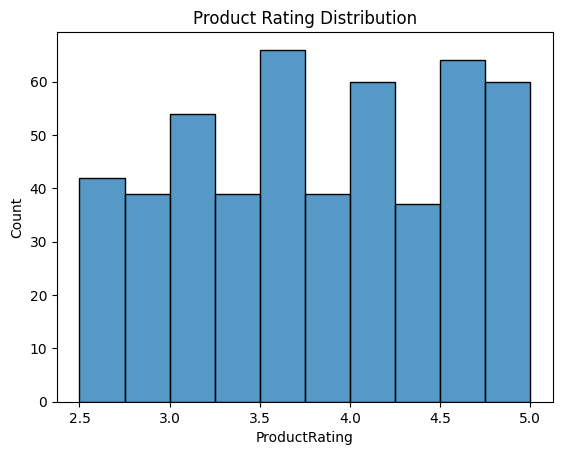

In [13]:
# Product Rating
sns.histplot(df['ProductRating'])
plt.title("Product Rating Distribution")


In [14]:
# | Column 1       | Column 2          | Relation Type           | Relation Validity ✅ | Reason                                                                  |
# | -------------- | ----------------- | ----------------------- | ------------------- | ----------------------------------------------------------------------- |
# | **Category**   | **ProductRating** | Categorical–Numerical   | ✅ Yes               | Alag categories ka customer satisfaction alag ho sakta hai.             |
# | **Brand**      | **ProductRating** | Categorical–Numerical   | ✅ Yes               | Har brand ka reputation aur quality alag hota hai.                      |
# | **Material**   | **ProductRating** | Categorical–Numerical   | ✅ Yes               | Material affect karta hai product ki durability aur user experience.    |
# | **Category**   | **Warranty**      | Categorical–Numerical   | ✅ Yes               | Electronics vs furniture ka warranty expectation different hota hai.    |
# | **Material**   | **Warranty**      | Categorical–Numerical   | ✅ Yes               | Some materials offer more warranty (metal vs plastic, etc.)             |
# | **Category**   | **Weight**        | Categorical–Numerical   | ✅ Yes               | Furniture heavier hoga, electronics lighter hoga — category affects it. |
# | **Brand**      | **Warranty**      | Categorical–Numerical   | ✅ Yes               | Premium brands longer warranty dete hain.                               |
# | **Category**   | **LaunchYear**    | Categorical–Numerical   | ✅ Yes               | New categories ka adoption track kar sakte hain.                        |
# | **LaunchYear** | **ProductRating** | Numerical–Numerical     | ✅ Yes               | Older products ka rating lower ho sakta hai, ya vice versa.             |
# | **Brand**      | **Material**      | Categorical–Categorical | ✅ Yes               | Some brands specialize in certain materials only.                       |
# | **Category**   | **Material**      | Categorical–Categorical | ✅ Yes               | Product type defines material — plastic in kitchen, wood in furniture.  |


# ProductRating by Category (Boxplot)

C:\Users\sachi\AppData\Local\Temp\ipykernel_21024\1014600141.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_rating.index, y=category_rating['mean'], palette='viridis')


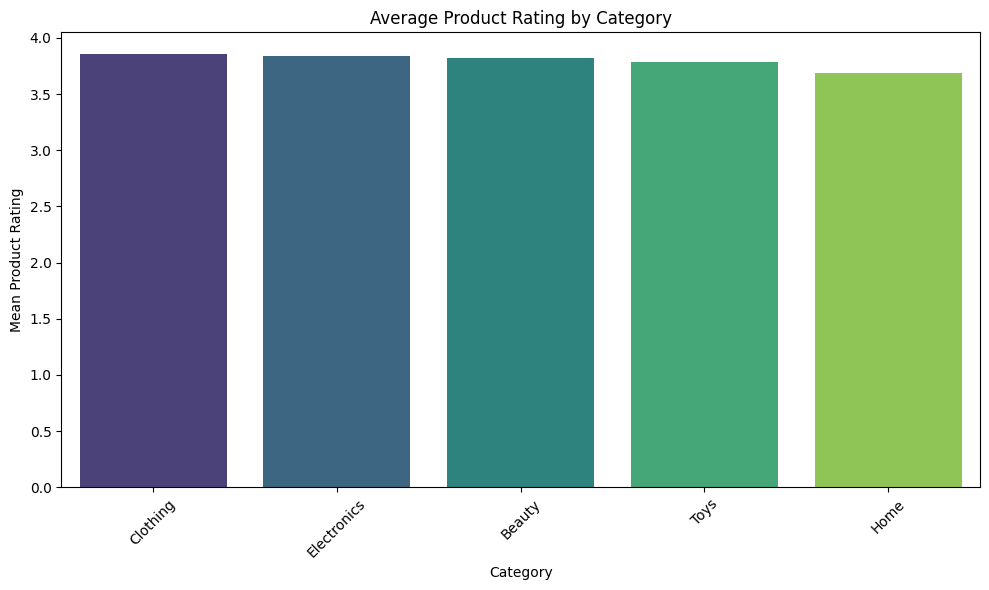

                 mean  count
Category                    
Clothing     3.856601    109
Electronics  3.837719     95
Beauty       3.825272    112
Toys         3.789247     93
Home         3.687839     91


In [15]:
category_rating = df.groupby('Category')['ProductRating'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=category_rating.index, y=category_rating['mean'], palette='viridis')
plt.title("Average Product Rating by Category")
plt.ylabel("Mean Product Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(category_rating)


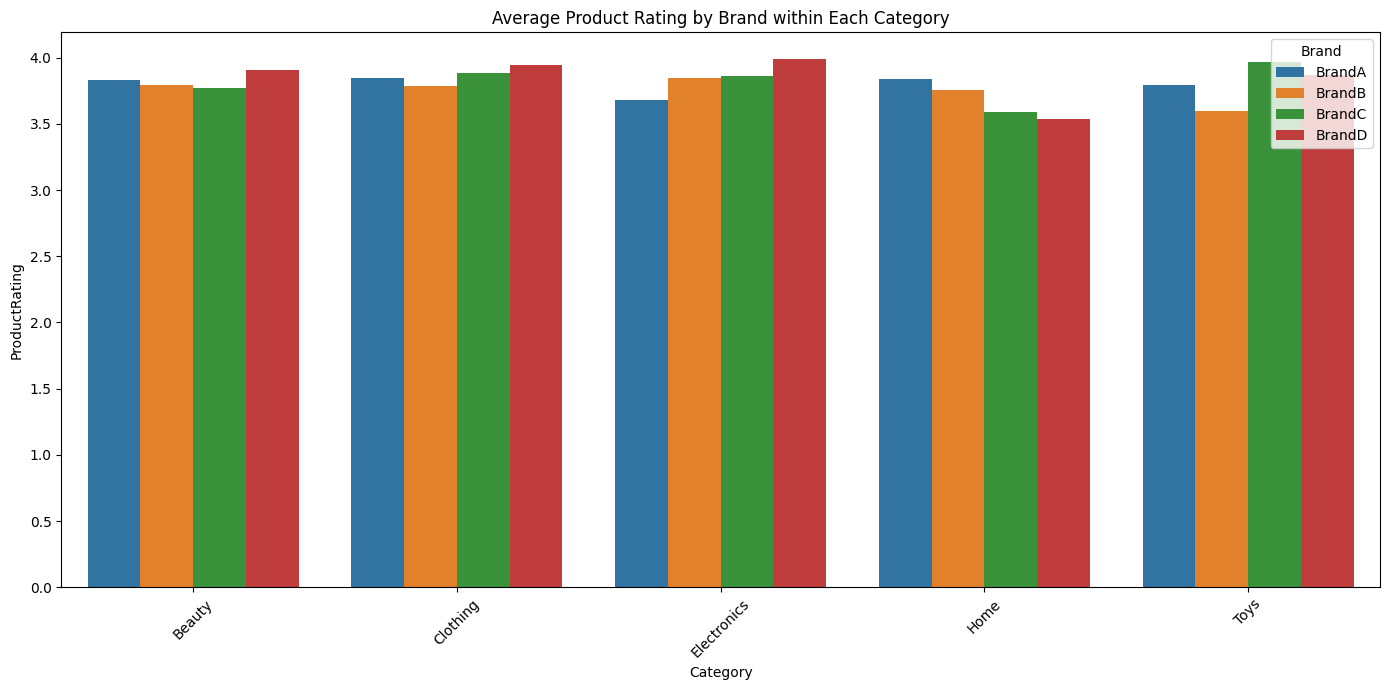

In [16]:
grouped = df.groupby(['Category', 'Brand'])['ProductRating'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(data=grouped, x='Category', y='ProductRating', hue='Brand')
plt.title("Average Product Rating by Brand within Each Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Average Product Rating by Top Brands

C:\Users\sachi\AppData\Local\Temp\ipykernel_21024\1338026433.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_rating.index, y=brand_rating['mean'], palette='magma')


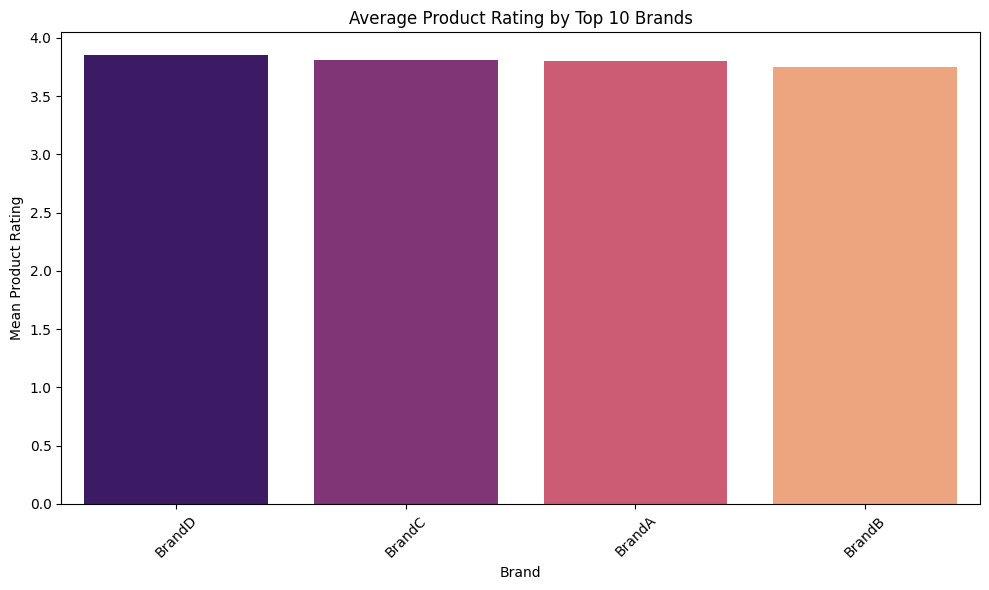

            mean  count
Brand                  
BrandD  3.855097    108
BrandC  3.810027    124
BrandA  3.800649    143
BrandB  3.752720    125


In [17]:
top_brands = df['Brand'].value_counts().head(10).index
brand_rating = df[df['Brand'].isin(top_brands)].groupby('Brand')['ProductRating'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=brand_rating.index, y=brand_rating['mean'], palette='magma')
plt.title("Average Product Rating by Top 10 Brands")
plt.ylabel("Mean Product Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(brand_rating)


# Material vs ProductRating

C:\Users\sachi\AppData\Local\Temp\ipykernel_21024\4179814575.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=material_rating.index, y=material_rating.values, palette='Blues_d')


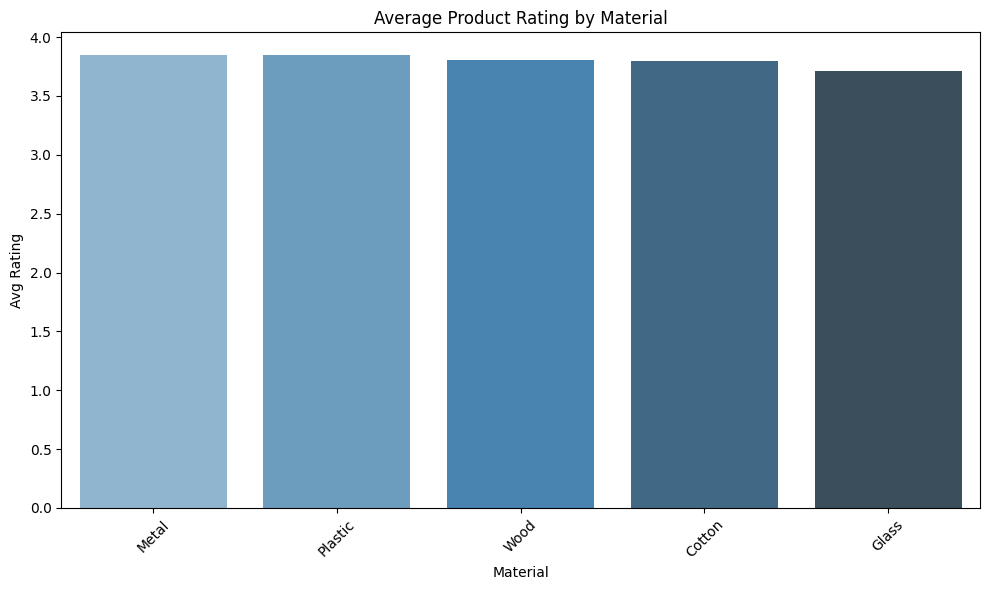

In [18]:
material_rating = df.groupby('Material')['ProductRating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=material_rating.index, y=material_rating.values, palette='Blues_d')
plt.title("Average Product Rating by Material")
plt.ylabel("Avg Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Category vs Warranty

C:\Users\sachi\AppData\Local\Temp\ipykernel_21024\1952994635.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_warranty.index, y=category_warranty.values, palette='Greens_d')


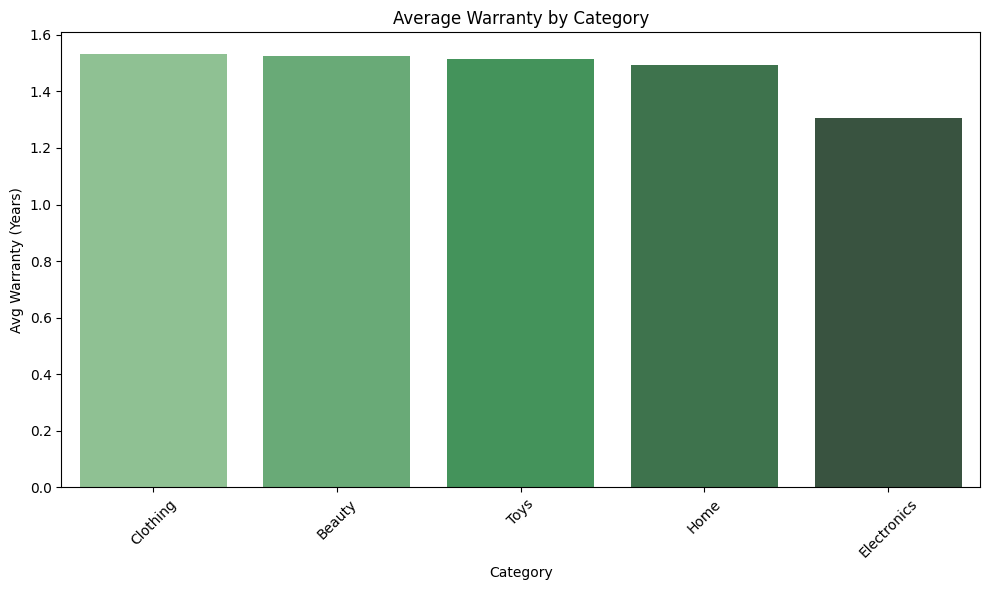

In [19]:
category_warranty = df.groupby('Category')['Warranty(years)'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=category_warranty.index, y=category_warranty.values, palette='Greens_d')
plt.title("Average Warranty by Category")
plt.ylabel("Avg Warranty (Years)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


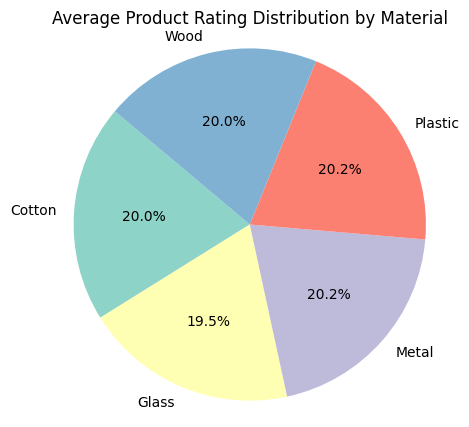

In [26]:


# Step 1: Calculate mean rating per material
material_rating = df.groupby('Material')['ProductRating'].mean()

# Step 2: Plot pie chart
plt.figure(figsize=(5,5))
plt.pie(material_rating, labels=material_rating.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title("Average Product Rating Distribution by Material")
plt.axis('equal')  # Equal aspect ratio for perfect circle
plt.show()


# warranty vs Brand

C:\Users\sachi\AppData\Local\Temp\ipykernel_21024\1603562274.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_warranty.index, y=brand_warranty.values, palette='Oranges')


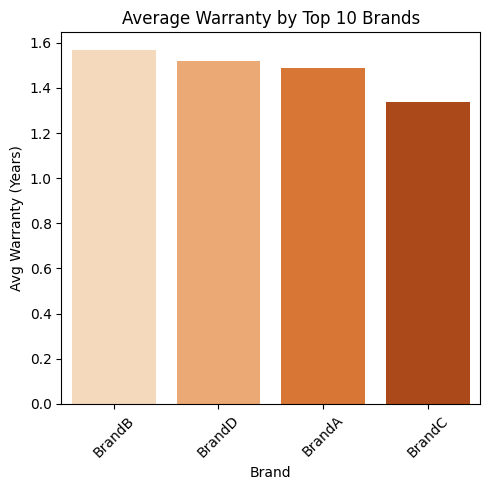

In [25]:
top_brands = df['Brand'].value_counts().head(10).index
brand_warranty = df[df['Brand'].isin(top_brands)].groupby('Brand')['Warranty(years)'].mean().sort_values(ascending=False)

plt.figure(figsize=(5,5))
sns.barplot(x=brand_warranty.index, y=brand_warranty.values, palette='Oranges')
plt.title("Average Warranty by Top 10 Brands")
plt.ylabel("Avg Warranty (Years)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


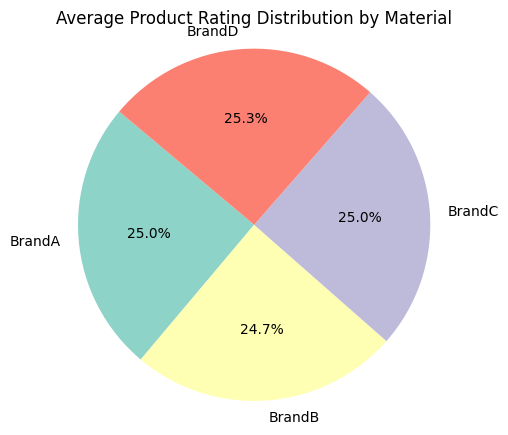

In [24]:


# Step 1: Calculate mean rating per material
material_rating = df.groupby('Brand')['ProductRating'].mean()

# Step 2: Plot pie chart
plt.figure(figsize=(5,5))
plt.pie(material_rating, labels=material_rating.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title("Average Product Rating Distribution by Material")
plt.axis('equal')  # Equal aspect ratio for perfect circle
plt.show()


# Category vs Weight

C:\Users\sachi\AppData\Local\Temp\ipykernel_21024\2806780080.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_weight.index, y=category_weight.values, palette='Purples')


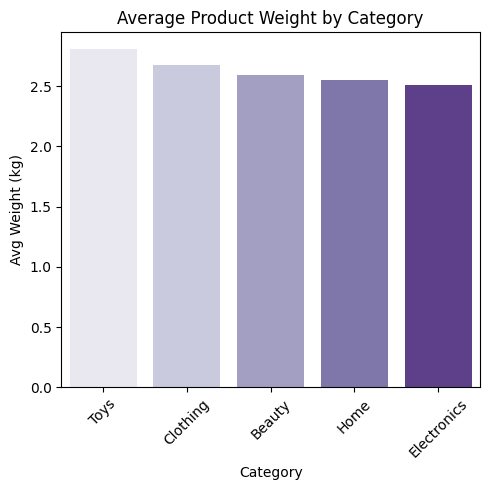

In [30]:
category_weight = df.groupby('Category')['Weight(kg)'].mean().sort_values(ascending=False)

plt.figure(figsize=(5,5))
sns.barplot(x=category_weight.index, y=category_weight.values, palette='Purples')
plt.title("Average Product Weight by Category")
plt.ylabel("Avg Weight (kg)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


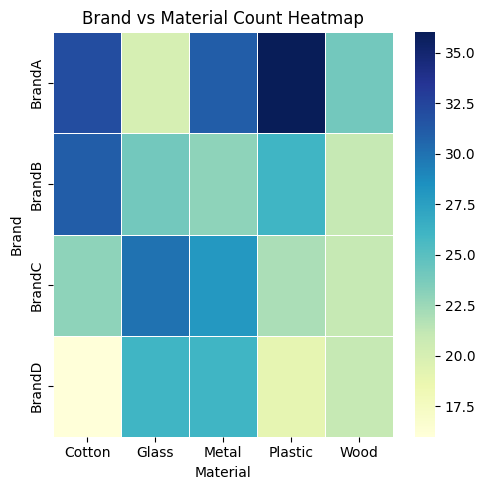

In [31]:
brand_material = pd.crosstab(df['Brand'], df['Material'])

plt.figure(figsize=(5,5))
sns.heatmap(brand_material, cmap='YlGnBu', linewidths=0.5)
plt.title("Brand vs Material Count Heatmap")
plt.xlabel("Material")
plt.ylabel("Brand")
plt.tight_layout()
plt.show()


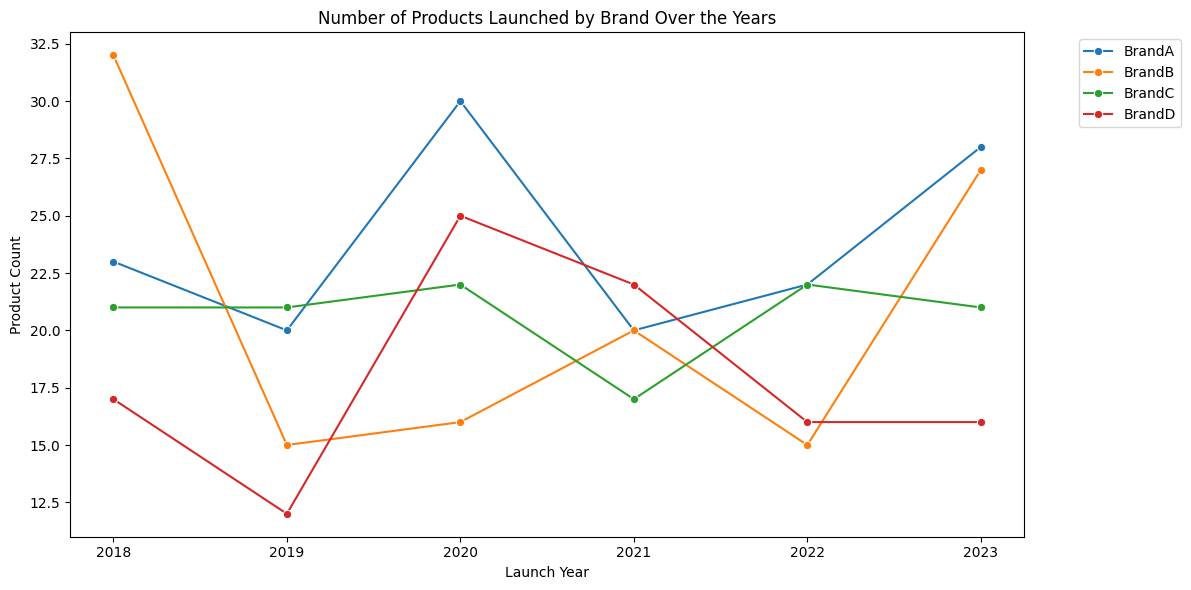

In [34]:
# Count of products launched per brand per year
brand_year = df.groupby(['LaunchYear', 'Brand']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=brand_year, x='LaunchYear', y='Count', hue='Brand', marker='o')
plt.title("Number of Products Launched by Brand Over the Years")
plt.xlabel("Launch Year")
plt.ylabel("Product Count")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Launch Year-wise Trend for Each Category

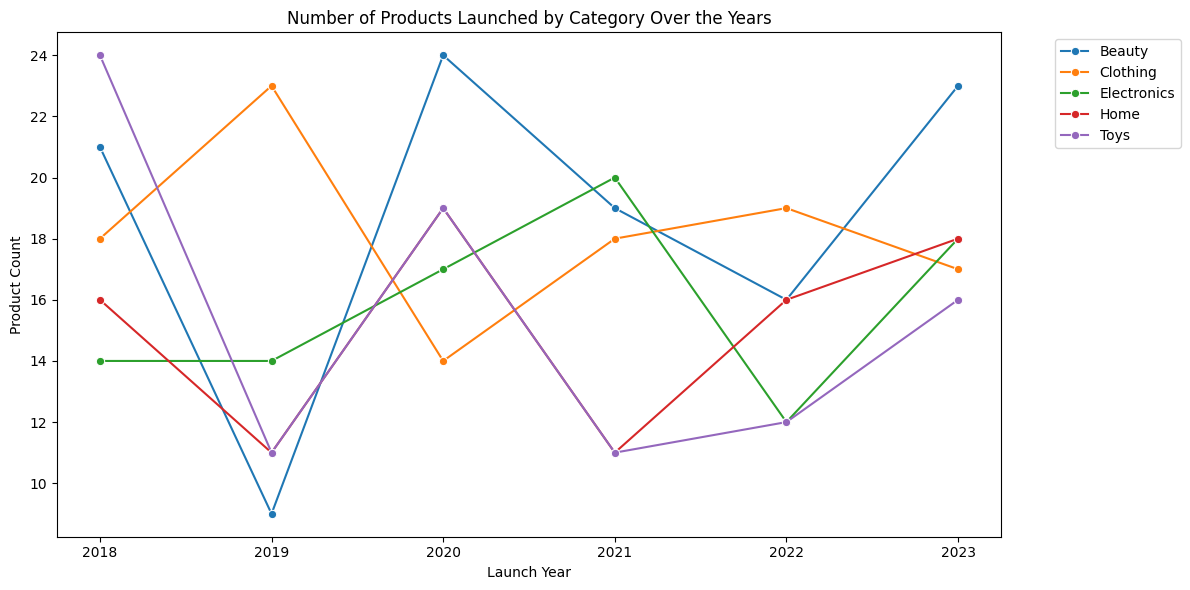

In [35]:
# Count of products launched per category per year
category_year = df.groupby(['LaunchYear', 'Category']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=category_year, x='LaunchYear', y='Count', hue='Category', marker='o')
plt.title("Number of Products Launched by Category Over the Years")
plt.xlabel("Launch Year")
plt.ylabel("Product Count")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [36]:
material_rating = df.groupby('Material')['ProductRating'].mean().reset_index()
print(material_rating)


  Material  ProductRating
0   Cotton       3.799183
1    Glass       3.711833
2    Metal       3.848060
3  Plastic       3.844429
4     Wood       3.805862


# launch Year wsie by product count

In [39]:
brand_year = df.groupby(['LaunchYear', 'Brand'],sort=True,).size().reset_index(name='Count')
print(brand_year)


    LaunchYear   Brand  Count
0         2018  BrandA     23
1         2018  BrandB     32
2         2018  BrandC     21
3         2018  BrandD     17
4         2019  BrandA     20
5         2019  BrandB     15
6         2019  BrandC     21
7         2019  BrandD     12
8         2020  BrandA     30
9         2020  BrandB     16
10        2020  BrandC     22
11        2020  BrandD     25
12        2021  BrandA     20
13        2021  BrandB     20
14        2021  BrandC     17
15        2021  BrandD     22
16        2022  BrandA     22
17        2022  BrandB     15
18        2022  BrandC     22
19        2022  BrandD     16
20        2023  BrandA     28
21        2023  BrandB     27
22        2023  BrandC     21
23        2023  BrandD     16


BrandA is the most consistent top performer, peaking multiple times. <br>
BrandC is stable and predictable, good for long-term planning.<br>
BrandB shows volatility, but potential to recover.<br>
BrandD is the weakest performer, needs improvement or may be niche-focused.<br>